# Sign Language Image Classification with Vision Transformers

### Dataset Preprocessing  for Vision Transformer (ViT) Model

### **Load Dataset**
   - The dataset is loaded using Keras's `image_dataset_from_directory` function.
   - Images are resized to 224x224 to match the input size of the ViT model.

### **Model and Feature Extractor Loading**:
   - The Vision Transformer model `vit-tiny-patch16` is loaded from the `transformers` library.
   - The corresponding feature extractor is also loaded to preprocess images for the model.

### **Preprocessing**:
   - A `preprocess_vit` function applies the feature extractor transformations to normalize and prepare images for the ViT model.
   - The dataset is mapped to this preprocessing function with parallelization for improved performance.

### **Dataset Splitting**:
   - The dataset is split into training (70%), validation (10%), and testing (20%) subsets.


### Install packages

### Import packages

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
# Import necessary libraries
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from datasets import load_dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from timm import create_model
from tqdm import tqdm
import numpy as np


In [4]:
class CustomDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset  # Directly store the dataset (no need for split)
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Access the subset's data directly
        data = self.dataset[idx]
        image = data['image']
        label = data['label']

        if self.transform:
            image = self.transform(image)

        return image, label


## Load dataset

In [5]:
import os

# Set up dataset path and name
kaggle_dataset = "muntakimrafi/bengali-sign-language-dataset"
dataset_dir = "./sign-language-dataset"  # Path to store the dataset

# Ensure the dataset directory exists
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    print("Downloading dataset from Kaggle...")

    # Download and unzip the dataset
    os.system(f"kaggle datasets download -d {kaggle_dataset} -p {dataset_dir} --unzip")
    print("Dataset downloaded and unzipped.")
else:
    print("Dataset already downloaded.")

Dataset downloaded and unzipped.


In [6]:
from datasets import load_dataset

# Specify the correct paths for the train and test datasets
train_dataset_path = "./sign-language-dataset/RESIZED_DATASET"
test_dataset_path = "./sign-language-dataset/RESIZED_TESTING_DATA"
# train_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_DATASET"
# test_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_TESTING_DATA"

# Load the train and test datasets separately using `imagefolder` format
train_dataset = load_dataset('imagefolder', data_dir=train_dataset_path)
test_dataset = load_dataset('imagefolder', data_dir=test_dataset_path)

# Print dataset details to verify
print("Train Dataset:", train_dataset)
print("Test Dataset:", test_dataset)


Resolving data files:   0%|          | 0/11061 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/1520 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Train Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 11061
    })
})
Test Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1520
    })
})


In [ ]:
import os
import pickle
from datasets import load_dataset

# Specify dataset paths
train_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_DATASET"
test_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_TESTING_DATA"

# Cache filenames for train and test datasets
train_cache_file = "bengali_train_dataset_cache.pkl"
test_cache_file = "bengali_test_dataset_cache.pkl"

# Load train dataset from cache or source
if os.path.exists(train_cache_file):
    print("Loading train dataset from cache...")
    with open(train_cache_file, "rb") as f:
        train_dataset = pickle.load(f)
else:
    print("Loading train dataset from source and caching it...")
    train_dataset = load_dataset('imagefolder', data_dir=train_dataset_path)
    with open(train_cache_file, "wb") as f:
        pickle.dump(train_dataset, f)

# Load test dataset from cache or source
if os.path.exists(test_cache_file):
    print("Loading test dataset from cache...")
    with open(test_cache_file, "rb") as f:
        test_dataset = pickle.load(f)
else:
    print("Loading test dataset from source and caching it...")
    test_dataset = load_dataset('imagefolder', data_dir=test_dataset_path)
    with open(test_cache_file, "wb") as f:
        pickle.dump(test_dataset, f)

# Print dataset details to verify
print("Train Dataset:", train_dataset)
print("Test Dataset:", test_dataset)


Loading train dataset from cache...
Loading test dataset from cache...
Train Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 11061
    })
})
Test Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1520
    })
})


In [ ]:
from PIL import Image

import os
from PIL import Image

# Corrected file path based on your message
file_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_TESTING_DATA\0\20180714_223926.jpg"

# Check if the file exists
if os.path.exists(file_path):
    # Open the image if it exists
    img = Image.open(file_path)
    print(f"Image dimensions: {img.size}")
else:
    print(f"File not found: {file_path}")




Image dimensions: (224, 224)


In [ ]:
def calculate_mean_std(dataset):
    loader = DataLoader(dataset, batch_size=64, shuffle=False)
    mean = 0.0
    std = 0.0
    total_pixels = 0  # Total number of pixels across all images

    for images, _ in loader:
        # Number of pixels in the batch (batch_size x height x width)
        batch_pixels = images.size(0) * images.size(2) * images.size(3)
        total_pixels += batch_pixels

        # Sum of means for the batch (across channels)
        mean += images.sum(dim=[0, 2, 3])  # Sum over height and width
        # Sum of squared differences for the batch
        std += (images ** 2).sum(dim=[0, 2, 3])

    # Divide by the total number of pixels to get the mean
    mean /= total_pixels
    # Divide by the total number of pixels, then sqrt to get the std
    std = torch.sqrt(std / total_pixels - mean ** 2)
    return mean, std


In [ ]:
transform_resized = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize the image to 224x224
    transforms.ToTensor(),            # Convert image to tensor
])

In [7]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx]['image']  # Access image from the dataset
        label = self.dataset[idx]['label']  # Access label from the dataset
        if self.transform:
            image = self.transform(image)  # Apply transformation to the image
        return image, label

In [ ]:
# Ensure you're passing the correct split of the dataset to CustomDataset
train_split = train_dataset['train']  # Access the 'train' split of your dataset

# Create the transformed dataset
train_dataset_transformed = CustomDataset(train_split, transform=transform_resized)

# Calculate mean and std using the transformed dataset
mean, std = calculate_mean_std(train_dataset_transformed)

# Print the calculated mean and std
print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: tensor([0.6273, 0.6064, 0.5793])
Std: tensor([0.1633, 0.1924, 0.2102])


In [ ]:
def calculate_num_classes(dataset):
    labels = [example['label'] for example in dataset]
    num_classes = len(set(labels))  # Get unique labels
    return num_classes

In [ ]:
num_classes = calculate_num_classes(train_dataset['train'])


In [ ]:
print(f"Number of classes in the dataset: {num_classes}")

Number of classes in the dataset: 38


In [8]:
# mean, std = calculate_mean_std(dataset['train'])
mean = [0.6273, 0.6064, 0.5793]
std = [0.1633, 0.1924,  0.2102]
num_classes = 38

In [ ]:
print(f"Number of classes: {num_classes}")
print(f" calculated mean: {mean}")
print(f" calculated std: {std}")

Number of classes: 18
 calculated mean: [0.5778126, 0.516726, 0.48417425]
 calculated std: [0.25172076, 0.24928826, 0.24764916]


In [9]:
from torch.utils.data import random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
# Now, apply the normalization step after calculating mean and std
transform_norm = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize the image to 224x224
    transforms.ToTensor(),            # Convert image to tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image with calculated mean and std
])

# Apply transformation to datasets
train_dataset = ImageFolder(root=train_dataset_path, transform=transform_norm)
test_dataset = ImageFolder(root=test_dataset_path, transform=transform_norm)

# Now, split the training dataset into train and validation
total_size = len(train_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # Remaining 20% for validation

train_split, val_split = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for train, validation, and test datasets
batch_size = 64
train_loader_resized = DataLoader(train_split, batch_size=batch_size, shuffle=True)
val_loader_resized = DataLoader(val_split, batch_size=batch_size, shuffle=False)
test_loader_resized = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
for images, labels in train_loader_resized:
    print(images.shape)  # Should print [64, 3, 224, 224]
    break  # Just to check one batch

torch.Size([64, 3, 224, 224])


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to plot class distribution with enhanced visualization
def plot_class_distribution(dataset, title):
    # Count occurrences of each class
    class_counts = Counter([dataset[i][1] for i in range(len(dataset))])

    # Sort class labels and counts
    labels, counts = zip(*sorted(class_counts.items()))

    # Create a larger figure for better visibility
    plt.figure(figsize=(12, 6))  # Set figure size (adjust as needed)

    # Plot the distribution
    plt.bar(labels, counts, tick_label=[str(label) for label in labels], color='skyblue')
    plt.xlabel('Class Labels', fontsize=14)
    plt.ylabel('Number of Samples', fontsize=14)
    plt.title(title, fontsize=16)

    # Rotate tick labels for better readability if there are many classes
    plt.xticks( fontsize=12)

    # Increase the size of the y-axis labels and ticks for better visibility
    plt.yticks(fontsize=12)

    # Display the plot
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()




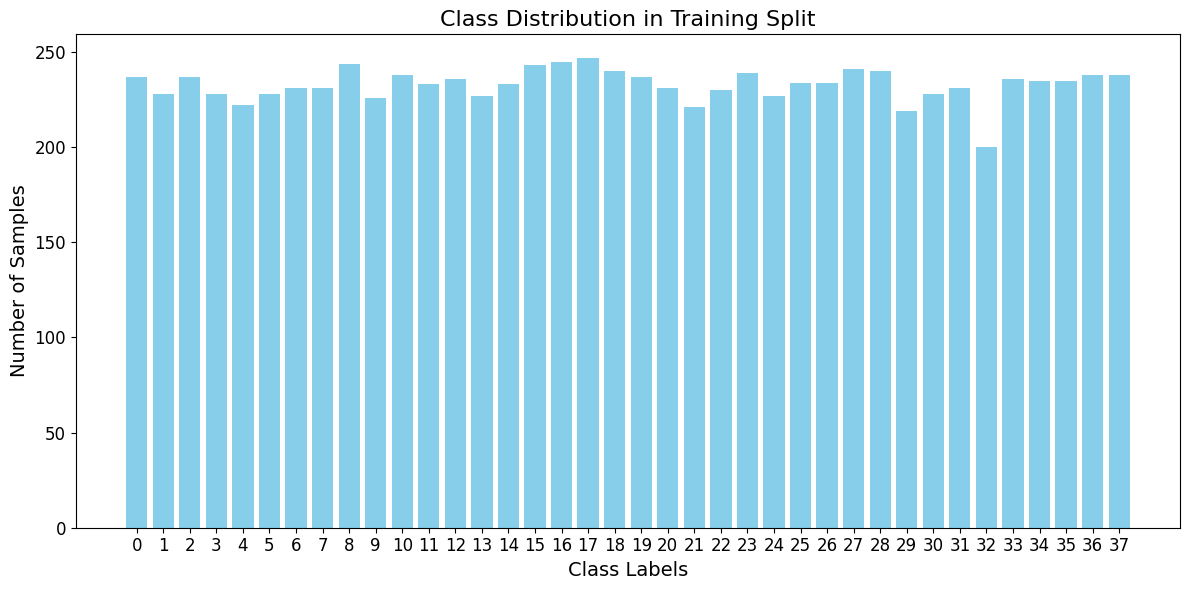

In [ ]:
plot_class_distribution(train_split, "Class Distribution in Training Split")

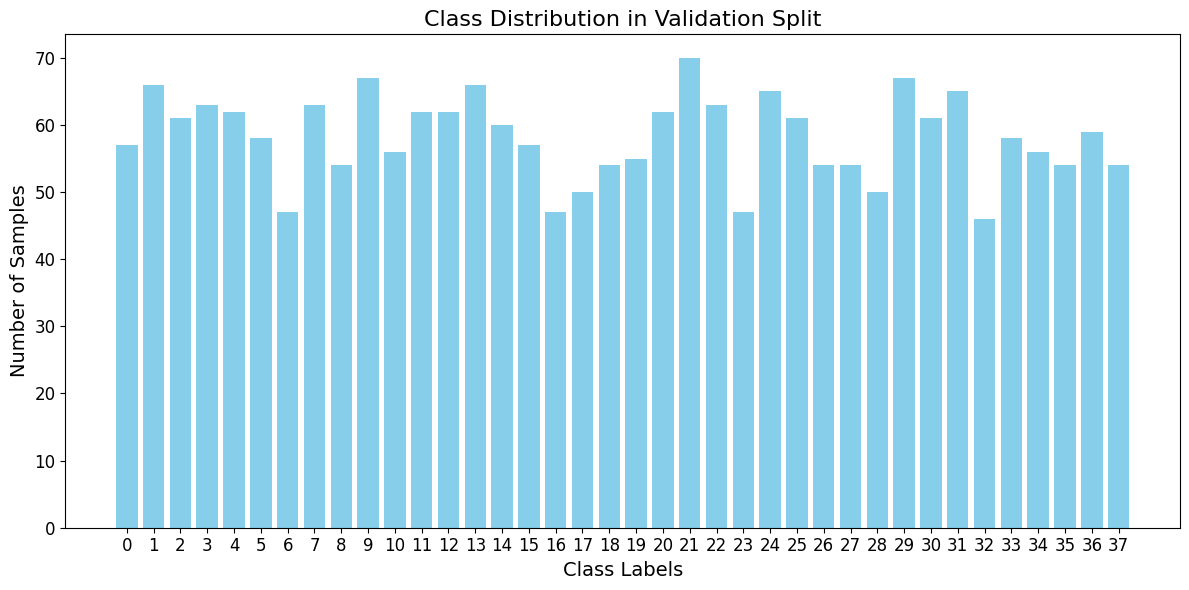

In [ ]:
# Plot for validation split
plot_class_distribution(val_split, "Class Distribution in Validation Split")

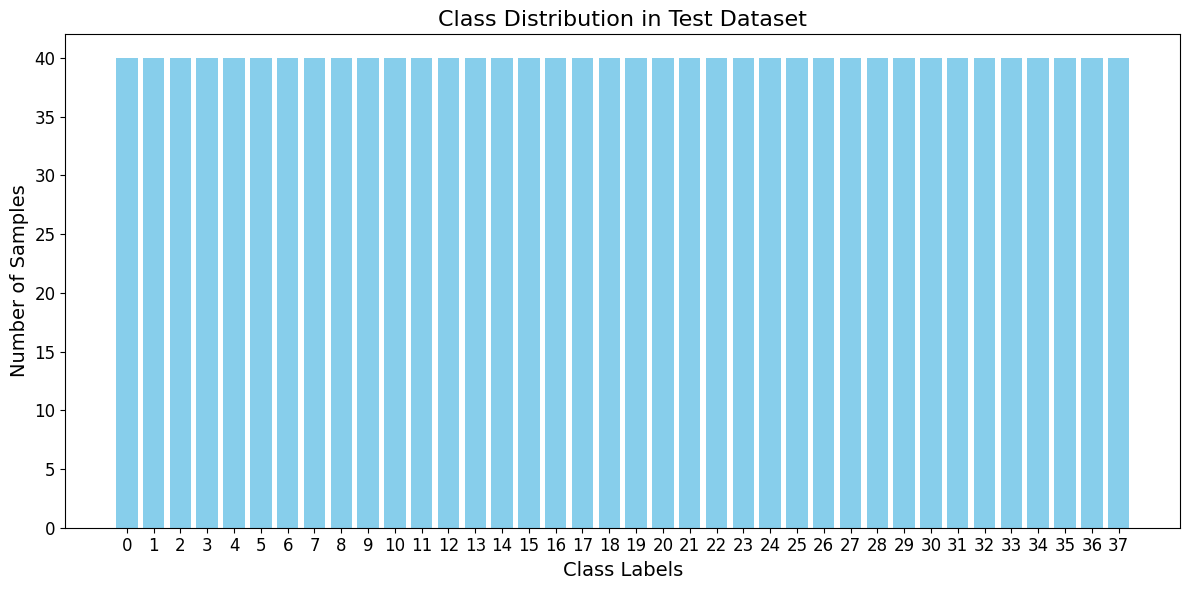

In [ ]:
# Plot for test dataset
plot_class_distribution(test_dataset, "Class Distribution in Test Dataset")

### Model Training - Full Vit Training

#### Trainer Class

In [10]:
from tqdm import tqdm
import torch

class Trainer:
    def __init__(self, model, optimizer, loss_fn, device, scheduler=None):
        """
        Initialize the Trainer class.

        Args:
            model (torch.nn.Module): The model to train.
            optimizer (torch.optim.Optimizer): Optimizer for updating weights.
            loss_fn (torch.nn.Module): Loss function.
            device (torch.device): Device to run training (CPU/GPU).
            scheduler (torch.optim.lr_scheduler, optional): Learning rate scheduler. Default is None.
        """
        self.model = model.to(device)
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.device = device
        self.scheduler = scheduler  # Optional scheduler

    def train_epoch(self, train_loader):
        """Train for one epoch and return loss and accuracy."""
        self.model.train()
        total_loss = 0
        correct = 0

        with tqdm(train_loader, desc="Training", unit="batch") as t:
            for images, labels in t:
                images, labels = images.to(self.device), labels.to(self.device)
                self.optimizer.zero_grad()
                logits = self.model(images)
                loss = self.loss_fn(logits, labels)
                loss.backward()
                self.optimizer.step()

                # Track loss and correct predictions
                total_loss += loss.item() * len(images)
                predictions = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()

                t.set_postfix(loss=loss.item())

        # Compute average loss and accuracy
        avg_loss = total_loss / len(train_loader.dataset)
        accuracy = correct / len(train_loader.dataset)
        return avg_loss, accuracy

    @torch.no_grad()
    def evaluate(self, dataloader):
        """Evaluate the model and return loss and accuracy."""
        self.model.eval()
        total_loss = 0
        correct = 0

        with tqdm(dataloader, desc="Validating", unit="batch") as t:
            for images, labels in t:
                images, labels = images.to(self.device), labels.to(self.device)
                logits = self.model(images)
                loss = self.loss_fn(logits, labels)

                # Track loss and correct predictions
                total_loss += loss.item() * len(images)
                predictions = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()

        # Compute average loss and accuracy
        avg_loss = total_loss / len(dataloader.dataset)
        accuracy = correct / len(dataloader.dataset)
        return avg_loss, accuracy

    def get_current_lr(self):
        """Retrieve the current learning rate from the optimizer."""
        return self.optimizer.param_groups[0]['lr']

    def train(self, train_loader, val_loader, epochs):
        """Train the model and evaluate it after each epoch."""
        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []
        learning_rates = []  # Track learning rate for each epoch

        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")

            # Training phase
            train_loss, train_accuracy = self.train_epoch(train_loader)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            # Validation phase
            val_loss, val_accuracy = self.evaluate(val_loader)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            # Get the learning rate
            current_lr = self.get_current_lr()
            learning_rates.append(current_lr)

            # Print epoch metrics
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
            print(f"Learning Rate: {current_lr:.6f}")

            # Step the scheduler, if provided
            if self.scheduler:
                self.scheduler.step(val_loss)  # Use validation loss for ReduceLROnPlateau

            torch.cuda.empty_cache()

        return train_losses, train_accuracies, val_losses, val_accuracies, learning_rates




In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


In [ ]:
from collections import Counter

# Assuming `train_dataset` contains labels
labels = [label for _, label in train_dataset]  # Extract labels
label_counts = Counter(labels)
print(label_counts)


Counter({16: 20665, 3: 20227, 13: 20146, 5: 20023, 7: 19918, 8: 19892, 1: 19838, 17: 19647, 9: 19627, 14: 19583, 0: 19561, 6: 19547, 15: 19466, 12: 19437, 4: 19397, 2: 19383, 10: 19363, 11: 19215})


In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
from timm import create_model

# Load the pre-trained ViT-Tiny model from timm
model = create_model(
    "vit_tiny_patch16_224",  # Pre-trained ViT-Tiny on ImageNet-1k
    pretrained=True,         # Load pre-trained weights
    num_classes=num_classes  # Use dynamic number of classes
)



# Unfreeze the entire model (train all layers)
for param in model.parameters():
    param.requires_grad = True

# Define optimizer with adjusted learning rate and weight decay
optimizer = optim.AdamW(
    model.parameters(), lr=2e-4, weight_decay=1e-4
)

# Define CrossEntropy loss function
loss_fn = nn.CrossEntropyLoss()


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Train the full ViT model
trainer = Trainer(model, optimizer, loss_fn, device, scheduler=None)
train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train(
    train_loader_resized, val_loader_resized, epochs=4
)

# Print learning rates for each epoch
print("Learning rates per epoch:", learning_rates)
# 6 minutes for 4 epochs


Epoch 1/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.06batch/s]


Train Loss: 1.9017, Train Accuracy: 0.4811
Validation Loss: 0.4556, Validation Accuracy: 0.8658
Learning Rate: 0.000200
Epoch 2/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.26batch/s]


Train Loss: 0.2695, Train Accuracy: 0.9203
Validation Loss: 0.3232, Validation Accuracy: 0.9019
Learning Rate: 0.000200
Epoch 3/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.12batch/s]


Train Loss: 0.1116, Train Accuracy: 0.9658
Validation Loss: 0.2871, Validation Accuracy: 0.9123
Learning Rate: 0.000200
Epoch 4/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.03batch/s]

Train Loss: 0.0766, Train Accuracy: 0.9773
Validation Loss: 0.2806, Validation Accuracy: 0.9218
Learning Rate: 0.000200
Learning rates per epoch: [0.0002, 0.0002, 0.0002, 0.0002]


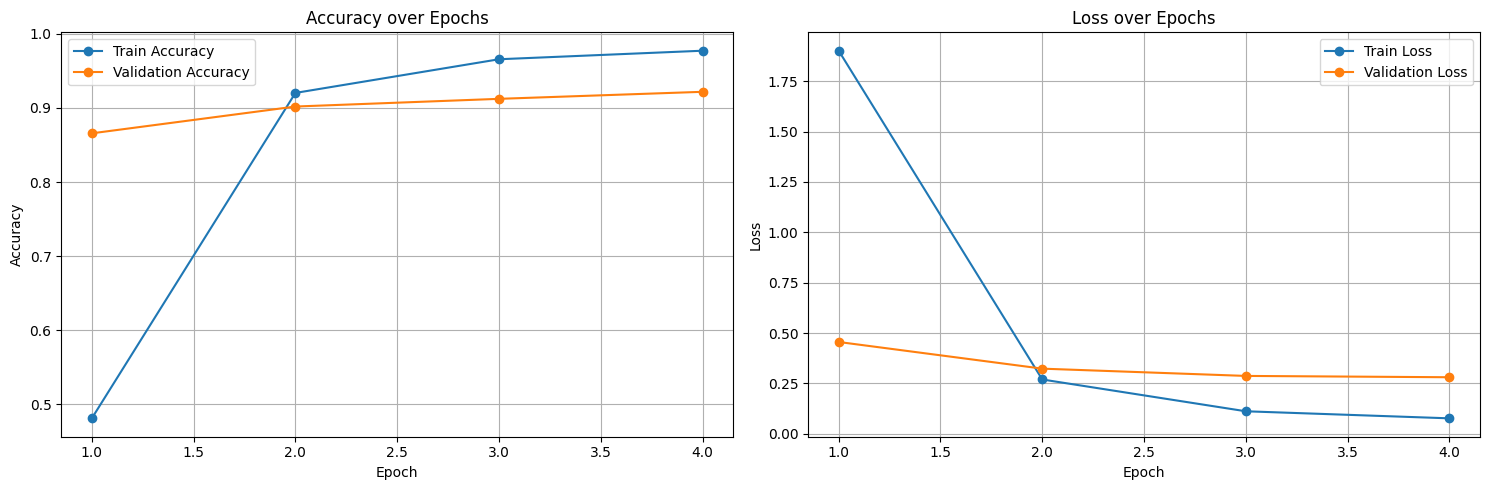

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: one for accuracy and one for loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot train and validation accuracy
axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label="Train Accuracy")
axes[0].plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', label="Validation Accuracy")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# Plot train and validation loss
axes[1].plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Train Loss")
axes[1].plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Validation Loss")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and true labels
y_true_classifier = []
y_pred_classifier = []
class_names = train_dataset.classes  # Automatically get class names from dataset

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in val_loader_resized:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        predictions = torch.argmax(logits, dim=1)
        y_true_classifier.extend(labels.cpu().numpy())
        y_pred_classifier.extend(predictions.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true_classifier, y_pred_classifier)





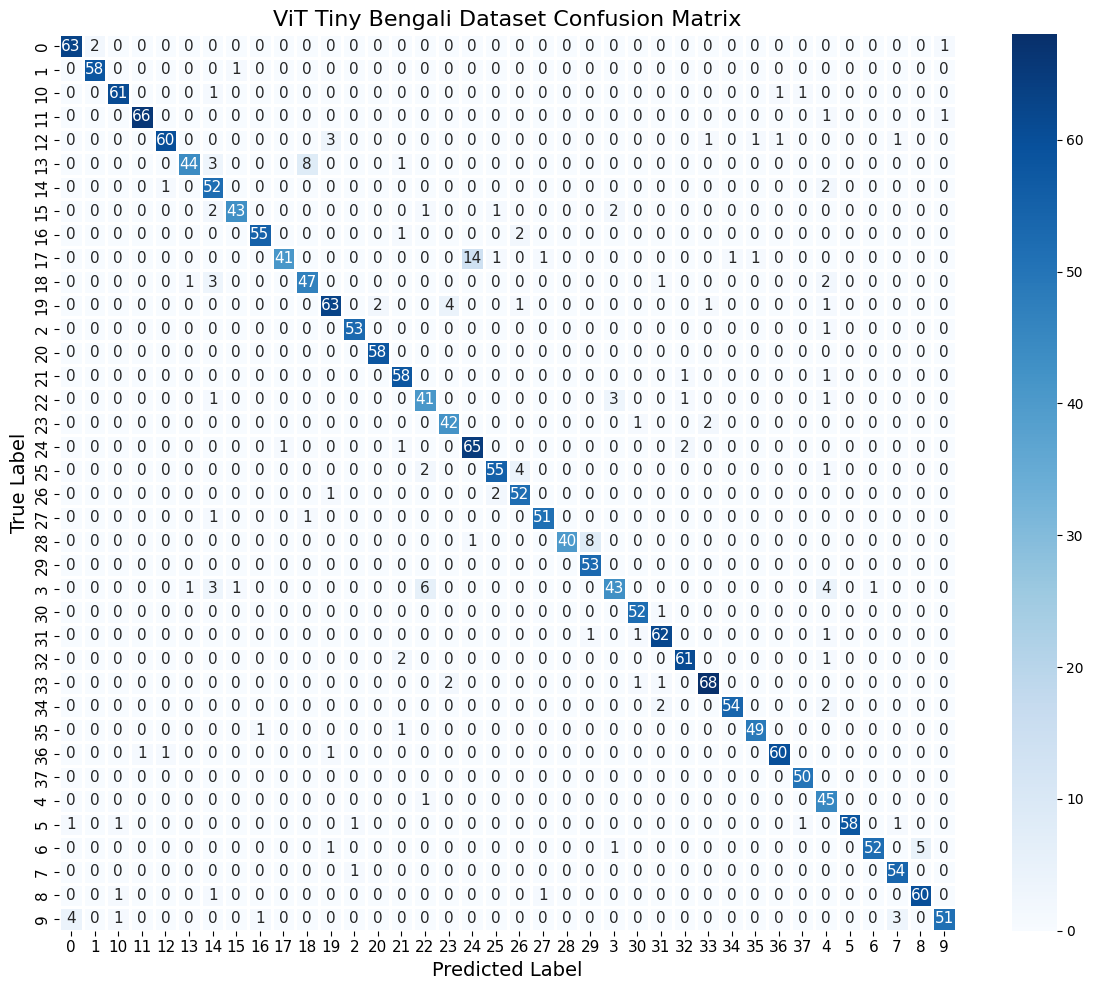

In [ ]:
# Plot the confusion matrix with a larger figure size and bigger margins
plt.figure(figsize=(12, 10))  # Adjust the figsize to make the plot larger
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True,
            annot_kws={"size": 11}, linewidths=1.8)  # Increase linewidth for better visibility of borders
plt.title("ViT Tiny Bengali Dataset Confusion Matrix", fontsize=16)  # Increase font size of the title
plt.xlabel("Predicted Label", fontsize=14)  # Increase font size of the x-axis label
plt.ylabel("True Label", fontsize=14)  # Increase font size of the y-axis label
plt.xticks(fontsize=11)  # Set x-tick font size
plt.yticks(fontsize=11)

# Adjust the padding around the plot and labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)  # Adjust the plot margins
plt.tight_layout()  # Ensure everything fits nicely within the plot area
plt.show()


In [ ]:
test_loss, test_accuracy = trainer.evaluate(test_loader_resized)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Validating: 100%|██████████| 24/24 [00:05<00:00,  4.16batch/s]

Test Loss: 0.3157, Test Accuracy: 0.9092


In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
from timm import create_model
import torch.optim as optim

# Load the pre-trained ViT-Tiny model from timm
model = create_model(
    "vit_tiny_patch16_224",  # Pre-trained ViT-Tiny on ImageNet-1k
    pretrained=True,         # Load pre-trained weights
    num_classes=num_classes  # Use dynamic number of classes
)

# Freeze all layers except the classifier head
for param in model.parameters():
    param.requires_grad = False

# Only unfreeze the classifier head
for param in model.head.parameters():
    param.requires_grad = True


# Define optimizer with adjusted learning rate and weight decay
optimizer = optim.AdamW(
    model.parameters(), lr=1e-3, weight_decay=1e-2
)
# Define CrossEntropy loss function
loss_fn = nn.CrossEntropyLoss()


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Train only the classifier head
trainer = Trainer(model, optimizer, loss_fn, device)
train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train(
    train_loader_resized, val_loader_resized, epochs=15
)

# Print learning rates for each epoch
print("Learning rates per epoch:", learning_rates)


Epoch 1/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.26batch/s]


Train Loss: 2.5393, Train Accuracy: 0.3131
Validation Loss: 1.9358, Validation Accuracy: 0.4614
Learning Rate: 0.001000
Epoch 2/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.38batch/s]


Train Loss: 1.6669, Train Accuracy: 0.5324
Validation Loss: 1.6205, Validation Accuracy: 0.5445
Learning Rate: 0.001000
Epoch 3/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.24batch/s]


Train Loss: 1.4292, Train Accuracy: 0.5973
Validation Loss: 1.5080, Validation Accuracy: 0.5676
Learning Rate: 0.001000
Epoch 4/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.18batch/s]


Train Loss: 1.3090, Train Accuracy: 0.6247
Validation Loss: 1.4695, Validation Accuracy: 0.5685
Learning Rate: 0.001000
Epoch 5/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.43batch/s]


Train Loss: 1.2220, Train Accuracy: 0.6443
Validation Loss: 1.4288, Validation Accuracy: 0.5779
Learning Rate: 0.001000
Epoch 6/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.44batch/s]


Train Loss: 1.1688, Train Accuracy: 0.6592
Validation Loss: 1.3980, Validation Accuracy: 0.5983
Learning Rate: 0.001000
Epoch 7/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.37batch/s]


Train Loss: 1.1137, Train Accuracy: 0.6704
Validation Loss: 1.3772, Validation Accuracy: 0.5992
Learning Rate: 0.001000
Epoch 8/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.32batch/s]


Train Loss: 1.0794, Train Accuracy: 0.6794
Validation Loss: 1.3667, Validation Accuracy: 0.6051
Learning Rate: 0.001000
Epoch 9/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.30batch/s]


Train Loss: 1.0445, Train Accuracy: 0.6928
Validation Loss: 1.3370, Validation Accuracy: 0.6146
Learning Rate: 0.001000
Epoch 10/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  3.99batch/s]


Train Loss: 1.0138, Train Accuracy: 0.6993
Validation Loss: 1.3467, Validation Accuracy: 0.6159
Learning Rate: 0.001000
Epoch 11/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  3.97batch/s]


Train Loss: 0.9911, Train Accuracy: 0.7089
Validation Loss: 1.3252, Validation Accuracy: 0.6204
Learning Rate: 0.001000
Epoch 12/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.33batch/s]


Train Loss: 0.9682, Train Accuracy: 0.7125
Validation Loss: 1.3099, Validation Accuracy: 0.6240
Learning Rate: 0.001000
Epoch 13/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.14batch/s]


Train Loss: 0.9579, Train Accuracy: 0.7134
Validation Loss: 1.3346, Validation Accuracy: 0.6082
Learning Rate: 0.001000
Epoch 14/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.41batch/s]


Train Loss: 0.9349, Train Accuracy: 0.7197
Validation Loss: 1.3120, Validation Accuracy: 0.6222
Learning Rate: 0.001000
Epoch 15/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.45batch/s]

Train Loss: 0.9197, Train Accuracy: 0.7226
Validation Loss: 1.3257, Validation Accuracy: 0.6240
Learning Rate: 0.001000
Learning rates per epoch: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


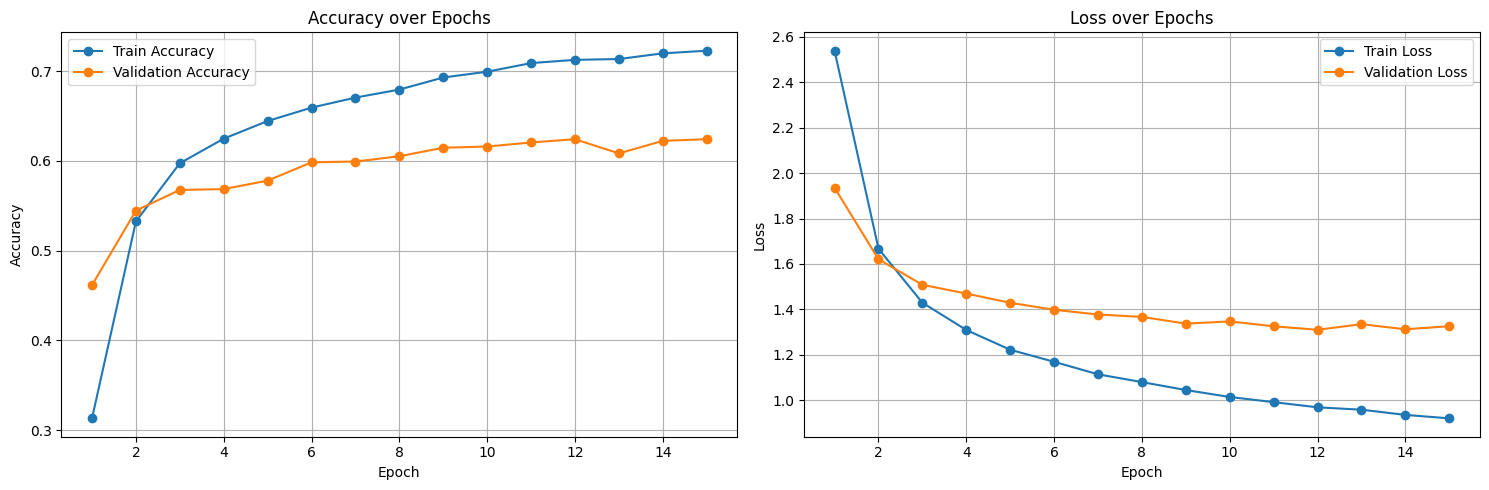

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: one for accuracy and one for loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot train and validation accuracy
axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label="Train Accuracy")
axes[0].plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', label="Validation Accuracy")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# Plot train and validation loss
axes[1].plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Train Loss")
axes[1].plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Validation Loss")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Generate predictions and true labels
y_true_classifier = []
y_pred_classifier = []
class_names = train_dataset.classes  # Automatically get class names from dataset

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in val_loader_resized:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        predictions = torch.argmax(logits, dim=1)
        y_true_classifier.extend(labels.cpu().numpy())
        y_pred_classifier.extend(predictions.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true_classifier, y_pred_classifier)


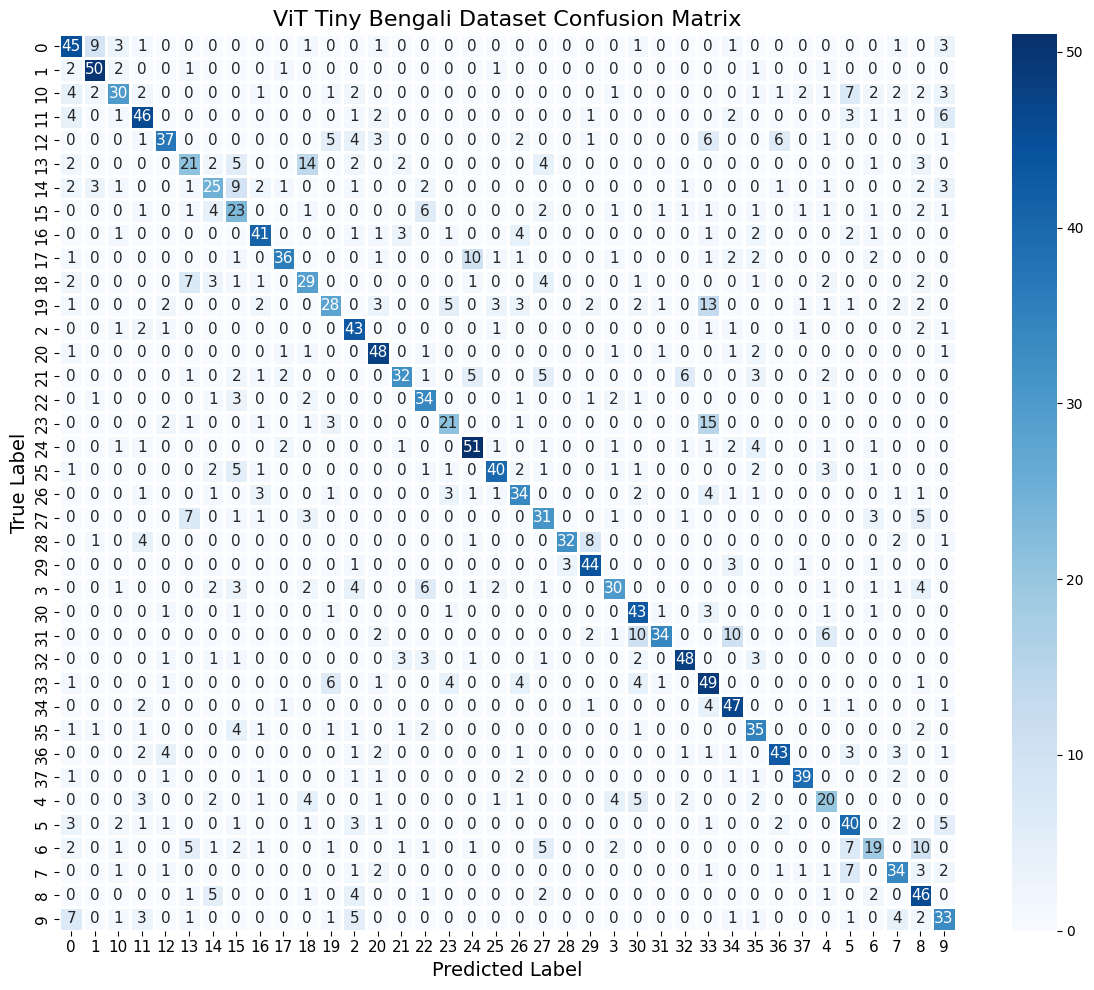

In [ ]:
# Plot the confusion matrix with a larger figure size and bigger margins
plt.figure(figsize=(12, 10))  # Adjust the figsize to make the plot larger
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True,
            annot_kws={"size": 11}, linewidths=1.8)  # Increase linewidth for better visibility of borders
plt.title("ViT Tiny Bengali Dataset Confusion Matrix", fontsize=16)  # Increase font size of the title
plt.xlabel("Predicted Label", fontsize=14)  # Increase font size of the x-axis label
plt.ylabel("True Label", fontsize=14)  # Increase font size of the y-axis label
plt.xticks(fontsize=11)  # Set x-tick font size
plt.yticks(fontsize=11)

# Adjust the padding around the plot and labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)  # Adjust the plot margins
plt.tight_layout()  # Ensure everything fits nicely within the plot area
plt.show()

In [ ]:
test_loss, test_accuracy = trainer.evaluate(test_loader_resized)


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.41batch/s]


In [ ]:
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.4323, Test Accuracy: 0.5711


In [12]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
from timm import create_model
import torch.optim as optim
import time
# Load the pre-trained ViT-Tiny model from timm
model = create_model(
    "vit_base_patch16_224",  # Pre-trained ViT-Tiny on ImageNet-1k
    pretrained=True,         # Load pre-trained weights
    num_classes=num_classes  # Use dynamic number of classes
)

# Freeze all layers except the classifier head
for param in model.parameters():
    param.requires_grad = False

# Only unfreeze the classifier head
for param in model.head.parameters():
    param.requires_grad = True


# Define optimizer with adjusted learning rate and weight decay
optimizer = optim.AdamW(
    model.parameters(), lr=5e-4, weight_decay=1e-2
)
# Define CrossEntropy loss function
loss_fn = nn.CrossEntropyLoss()


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Train only the classifier head
trainer = Trainer(model, optimizer, loss_fn, device)
start_time = time.time()

train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train(
    train_loader_resized, val_loader_resized, epochs=12
)


# End timer after training
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time


# Print learning rates for each epoch
print("Learning rates per epoch:", learning_rates)
print(f"Training completed in: {elapsed_time:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.21batch/s]


Train Loss: 2.5498, Train Accuracy: 0.3284
Validation Loss: 1.8904, Validation Accuracy: 0.4871
Learning Rate: 0.000500
Epoch 2/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 1.5738, Train Accuracy: 0.5972
Validation Loss: 1.4576, Validation Accuracy: 0.6136
Learning Rate: 0.000500
Epoch 3/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 1.2347, Train Accuracy: 0.6878
Validation Loss: 1.2599, Validation Accuracy: 0.6629
Learning Rate: 0.000500
Epoch 4/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 1.0406, Train Accuracy: 0.7433
Validation Loss: 1.1320, Validation Accuracy: 0.6945
Learning Rate: 0.000500
Epoch 5/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 0.9140, Train Accuracy: 0.7749
Validation Loss: 1.0535, Validation Accuracy: 0.7099
Learning Rate: 0.000500
Epoch 6/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 0.8188, Train Accuracy: 0.8026
Validation Loss: 0.9841, Validation Accuracy: 0.7311
Learning Rate: 0.000500
Epoch 7/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 0.7445, Train Accuracy: 0.8243
Validation Loss: 0.9672, Validation Accuracy: 0.7244
Learning Rate: 0.000500
Epoch 8/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.23batch/s]


Train Loss: 0.6853, Train Accuracy: 0.8393
Validation Loss: 0.9281, Validation Accuracy: 0.7329
Learning Rate: 0.000500
Epoch 9/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.21batch/s]


Train Loss: 0.6346, Train Accuracy: 0.8476
Validation Loss: 0.9025, Validation Accuracy: 0.7393
Learning Rate: 0.000500
Epoch 10/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 0.5932, Train Accuracy: 0.8626
Validation Loss: 0.8559, Validation Accuracy: 0.7555
Learning Rate: 0.000500
Epoch 11/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]


Train Loss: 0.5559, Train Accuracy: 0.8706
Validation Loss: 0.8308, Validation Accuracy: 0.7646
Learning Rate: 0.000500
Epoch 12/12


Validating: 100%|██████████| 35/35 [00:28<00:00,  1.22batch/s]

Train Loss: 0.5230, Train Accuracy: 0.8851
Validation Loss: 0.8332, Validation Accuracy: 0.7605
Learning Rate: 0.000500
Learning rates per epoch: [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]
Training completed in: 1719.08 seconds


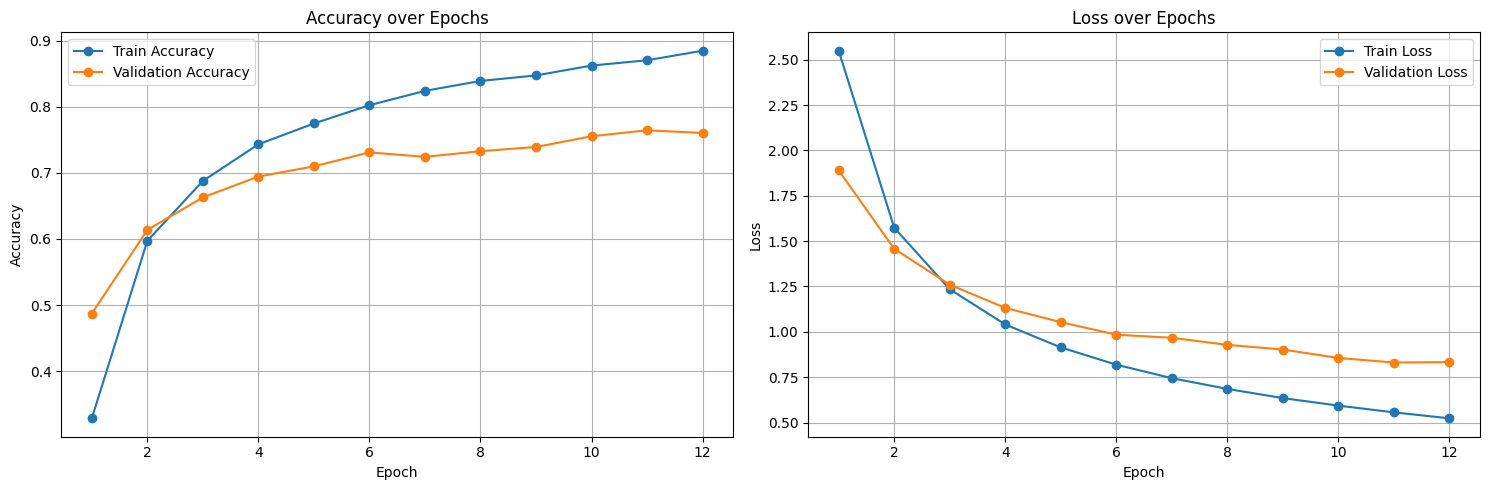

In [13]:
import matplotlib.pyplot as plt

# Create subplots: one for accuracy and one for loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot train and validation accuracy
axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label="Train Accuracy")
axes[0].plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', label="Validation Accuracy")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# Plot train and validation loss
axes[1].plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Train Loss")
axes[1].plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Validation Loss")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [14]:
# Generate predictions and true labels
y_true_classifier = []
y_pred_classifier = []
class_names = train_dataset.classes  # Automatically get class names from dataset

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in val_loader_resized:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        predictions = torch.argmax(logits, dim=1)
        y_true_classifier.extend(labels.cpu().numpy())
        y_pred_classifier.extend(predictions.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true_classifier, y_pred_classifier)

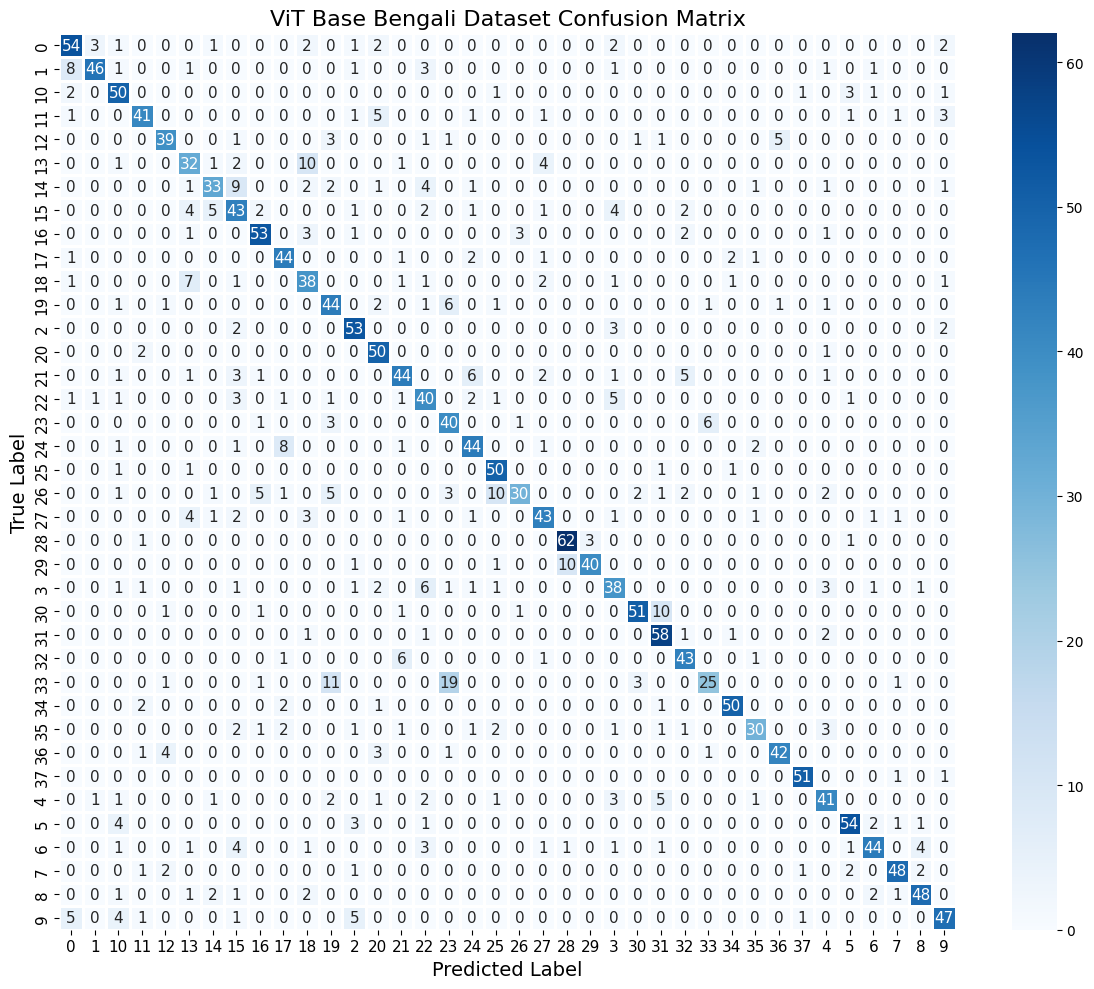

In [15]:
# Plot the confusion matrix with a larger figure size and bigger margins
plt.figure(figsize=(12, 10))  # Adjust the figsize to make the plot larger
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True,
            annot_kws={"size": 11}, linewidths=1.8)  # Increase linewidth for better visibility of borders
plt.title("ViT Base Bengali Dataset Confusion Matrix", fontsize=16)  # Increase font size of the title
plt.xlabel("Predicted Label", fontsize=14)  # Increase font size of the x-axis label
plt.ylabel("True Label", fontsize=14)  # Increase font size of the y-axis label
plt.xticks(fontsize=11)  # Set x-tick font size
plt.yticks(fontsize=11)

# Adjust the padding around the plot and labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)  # Adjust the plot margins
plt.tight_layout()  # Ensure everything fits nicely within the plot area
plt.show()

In [16]:
test_loss, test_accuracy = trainer.evaluate(test_loader_resized)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Validating: 100%|██████████| 24/24 [00:19<00:00,  1.21batch/s]

Test Loss: 0.8345, Test Accuracy: 0.7526


In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
from timm import create_model

# Load the pre-trained ViT-Tiny model from timm
model = create_model(
    "efficientvit_m5.r224_in1k",  # Pre-trained ViT-Tiny on ImageNet-1k
    pretrained=True,         # Load pre-trained weights
    num_classes=num_classes  # Use dynamic number of classes
)



# Unfreeze the entire model (train all layers)
for param in model.parameters():
    param.requires_grad = True

# Define optimizer with adjusted learning rate and weight decay
optimizer = optim.AdamW(
    model.parameters(), lr=1e-4, weight_decay=5e-3
)


# Define CrossEntropy loss function
loss_fn = nn.CrossEntropyLoss()


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Train the full ViT model
trainer = Trainer(model, optimizer, loss_fn, device, scheduler=None)
train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train(
    train_loader_resized, val_loader_resized, epochs=10
)

# Print learning rates for each epoch
print("Learning rates per epoch:", learning_rates)
# 9 minutes for 10 epochs


Epoch 1/10


Validating: 100%|██████████| 35/35 [00:05<00:00,  5.95batch/s]


Train Loss: 3.5584, Train Accuracy: 0.0918
Validation Loss: 3.6407, Validation Accuracy: 0.2436
Learning Rate: 0.000100
Epoch 2/10


Validating: 100%|██████████| 35/35 [00:05<00:00,  6.00batch/s]


Train Loss: 3.0789, Train Accuracy: 0.4256
Validation Loss: 2.8167, Validation Accuracy: 0.5237
Learning Rate: 0.000100
Epoch 3/10


Validating: 100%|██████████| 35/35 [00:05<00:00,  5.90batch/s]


Train Loss: 2.1380, Train Accuracy: 0.6554
Validation Loss: 1.6707, Validation Accuracy: 0.7343
Learning Rate: 0.000100
Epoch 4/10


Validating: 100%|██████████| 35/35 [00:05<00:00,  5.95batch/s]


Train Loss: 1.3050, Train Accuracy: 0.8038
Validation Loss: 1.0103, Validation Accuracy: 0.8333
Learning Rate: 0.000100
Epoch 5/10


Validating: 100%|██████████| 35/35 [00:06<00:00,  5.31batch/s]


Train Loss: 0.7722, Train Accuracy: 0.8879
Validation Loss: 0.7045, Validation Accuracy: 0.8640
Learning Rate: 0.000100
Epoch 6/10


Validating: 100%|██████████| 35/35 [00:06<00:00,  5.53batch/s]


Train Loss: 0.4666, Train Accuracy: 0.9289
Validation Loss: 0.4977, Validation Accuracy: 0.8902
Learning Rate: 0.000100
Epoch 7/10


Validating: 100%|██████████| 35/35 [00:06<00:00,  5.52batch/s]


Train Loss: 0.2793, Train Accuracy: 0.9615
Validation Loss: 0.3758, Validation Accuracy: 0.9110
Learning Rate: 0.000100
Epoch 8/10


Validating: 100%|██████████| 35/35 [00:06<00:00,  5.52batch/s]


Train Loss: 0.1815, Train Accuracy: 0.9766
Validation Loss: 0.3382, Validation Accuracy: 0.9074
Learning Rate: 0.000100
Epoch 9/10


Validating: 100%|██████████| 35/35 [00:05<00:00,  6.02batch/s]


Train Loss: 0.1113, Train Accuracy: 0.9885
Validation Loss: 0.3242, Validation Accuracy: 0.9191
Learning Rate: 0.000100
Epoch 10/10


Validating: 100%|██████████| 35/35 [00:05<00:00,  5.92batch/s]

Train Loss: 0.0770, Train Accuracy: 0.9947
Validation Loss: 0.3089, Validation Accuracy: 0.9146
Learning Rate: 0.000100
Learning rates per epoch: [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]


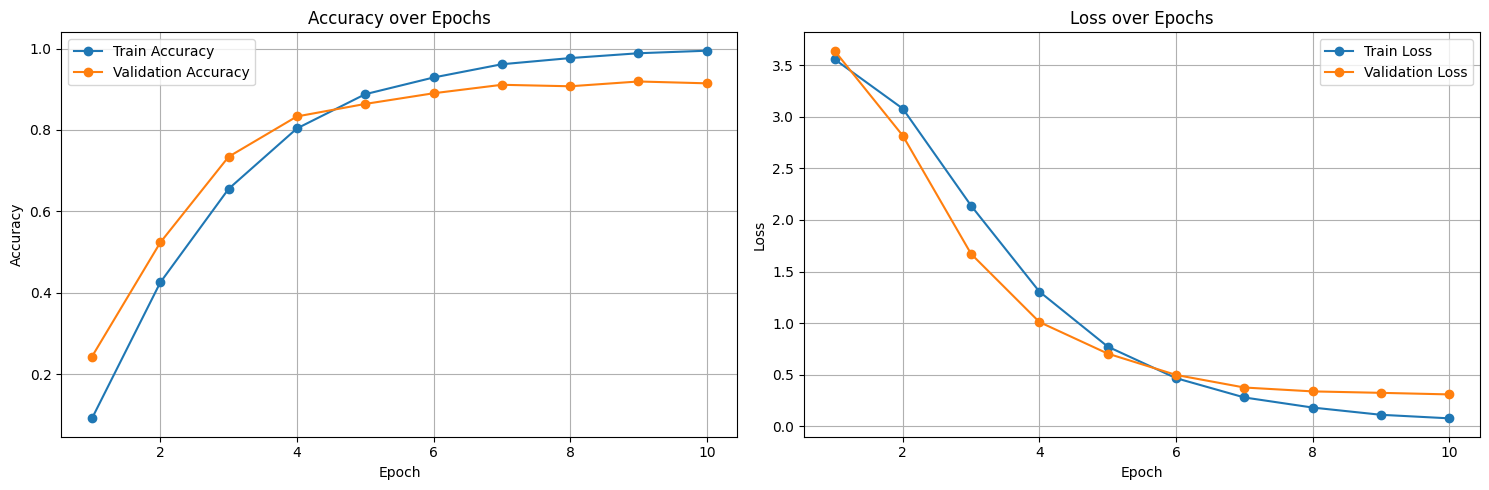

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: one for accuracy and one for loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot train and validation accuracy
axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label="Train Accuracy")
axes[0].plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', label="Validation Accuracy")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# Plot train and validation loss
axes[1].plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Train Loss")
axes[1].plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Validation Loss")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Generate predictions and true labels
y_true_classifier = []
y_pred_classifier = []
class_names = train_dataset.classes  # Automatically get class names from dataset

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in val_loader_resized:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        predictions = torch.argmax(logits, dim=1)
        y_true_classifier.extend(labels.cpu().numpy())
        y_pred_classifier.extend(predictions.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true_classifier, y_pred_classifier)


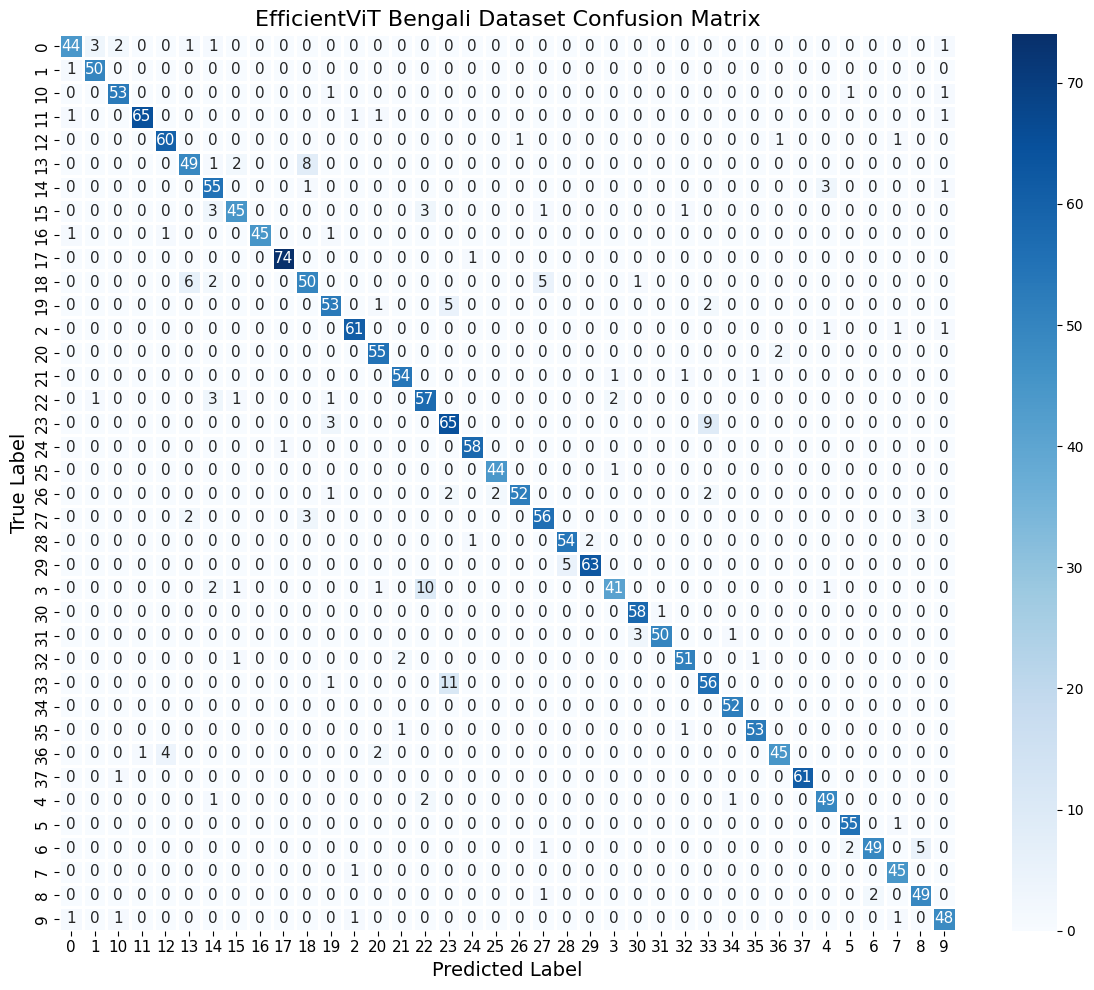

In [ ]:
# Plot the confusion matrix with a larger figure size and bigger margins
plt.figure(figsize=(12, 10))  # Adjust the figsize to make the plot larger
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True,
            annot_kws={"size": 11}, linewidths=1.8)  # Increase linewidth for better visibility of borders
plt.title("EfficientViT Bengali Dataset Confusion Matrix", fontsize=16)  # Increase font size of the title
plt.xlabel("Predicted Label", fontsize=14)  # Increase font size of the x-axis label
plt.ylabel("True Label", fontsize=14)  # Increase font size of the y-axis label
plt.xticks(fontsize=11)  # Set x-tick font size
plt.yticks(fontsize=11)

# Adjust the padding around the plot and labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)  # Adjust the plot margins
plt.tight_layout()  # Ensure everything fits nicely within the plot area
plt.show()

In [ ]:
test_loss, test_accuracy = trainer.evaluate(test_loader_resized)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Validating: 100%|██████████| 24/24 [00:04<00:00,  5.81batch/s]

Test Loss: 0.2973, Test Accuracy: 0.9257


In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
from timm import create_model
import time
# Load the pre-trained ViT-Tiny model from timm
model = create_model(
    "deit3_small_patch16_224.fb_in22k_ft_in1k",  # Pre-trained ViT-Tiny on ImageNet-1k
    pretrained=True,         # Load pre-trained weights
    num_classes=num_classes  # Use dynamic number of classes
)


# Unfreeze the entire model (train all layers)
for param in model.parameters():
    param.requires_grad = True

# Define optimizer with adjusted learning rate and weight decay
optimizer = optim.AdamW(
    model.parameters(), lr=2e-4, weight_decay=1e-2
)

# Define CrossEntropy loss function
loss_fn = nn.CrossEntropyLoss()


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Train the full ViT model
trainer = Trainer(model, optimizer, loss_fn, device, scheduler=None)

start_time = time.time()

train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train(
    train_loader_resized, val_loader_resized, epochs=2
)

# End timer after training
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print learning rates for each epoch
print("Learning rates per epoch:", learning_rates)
print(f"Training completed in: {elapsed_time:.2f} seconds")

Epoch 1/2


Validating: 100%|██████████| 35/35 [00:48<00:00,  1.37s/batch]


Train Loss: 0.9349, Train Accuracy: 0.7414
Validation Loss: 0.2459, Validation Accuracy: 0.9245
Learning Rate: 0.000200
Epoch 2/2


Validating: 100%|██████████| 35/35 [00:17<00:00,  2.03batch/s]

Train Loss: 0.1704, Train Accuracy: 0.9494
Validation Loss: 0.2318, Validation Accuracy: 0.9354
Learning Rate: 0.000200
Learning rates per epoch: [0.0002, 0.0002]
Training completed in: 1223.48 seconds


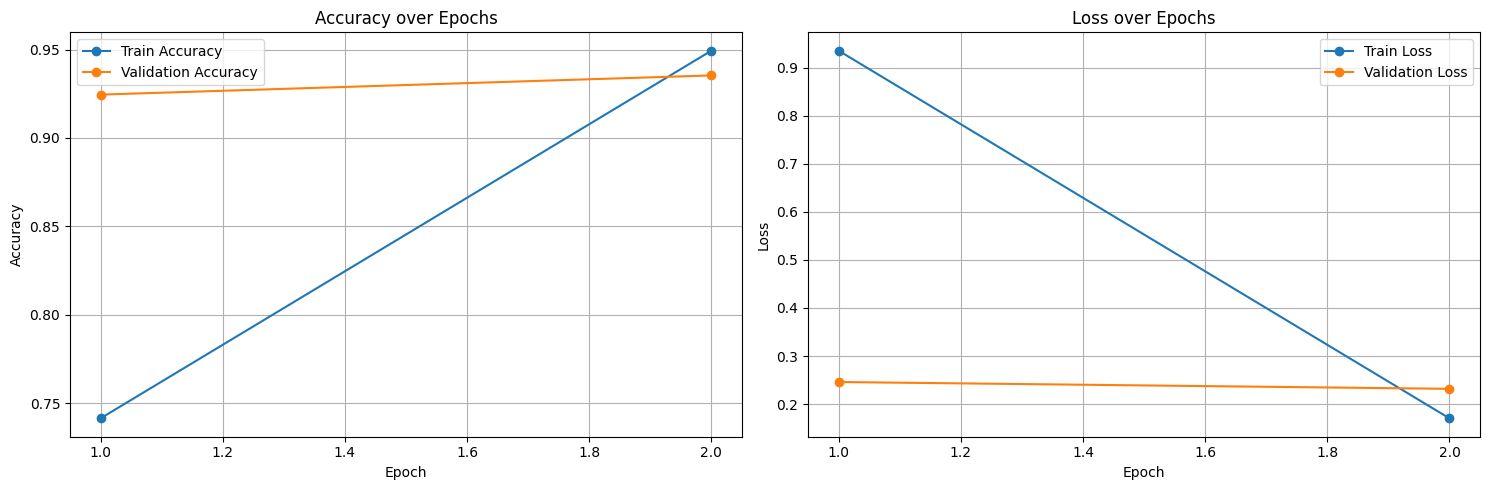

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: one for accuracy and one for loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot train and validation accuracy
axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label="Train Accuracy")
axes[0].plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', label="Validation Accuracy")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# Plot train and validation loss
axes[1].plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Train Loss")
axes[1].plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Validation Loss")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Generate predictions and true labels
y_true_classifier = []
y_pred_classifier = []
class_names = train_dataset.classes  # Automatically get class names from dataset

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in val_loader_resized:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        predictions = torch.argmax(logits, dim=1)
        y_true_classifier.extend(labels.cpu().numpy())
        y_pred_classifier.extend(predictions.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true_classifier, y_pred_classifier)

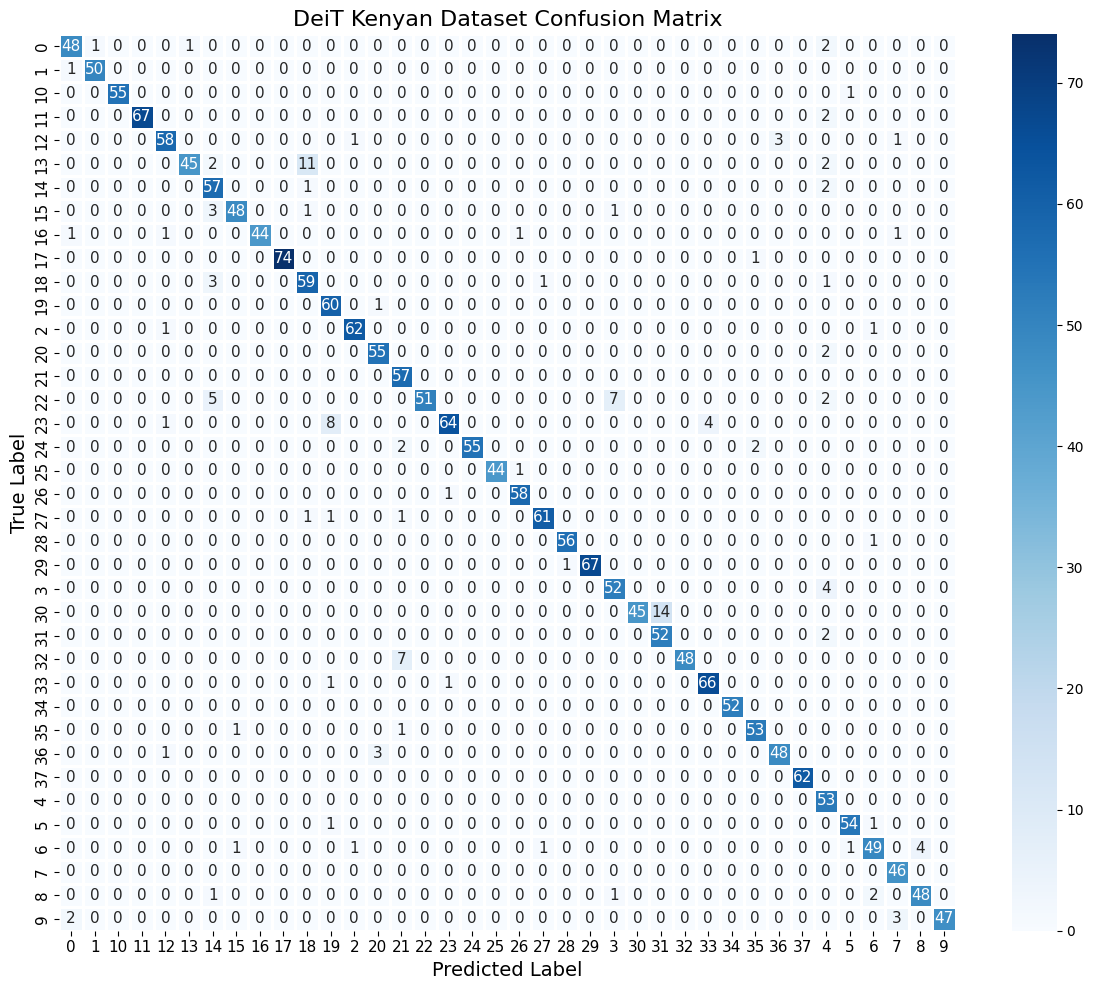

In [ ]:
# Plot the confusion matrix with a larger figure size and bigger margins
plt.figure(figsize=(12, 10))  # Adjust the figsize to make the plot larger
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True,
            annot_kws={"size": 11}, linewidths=1.8)  # Increase linewidth for better visibility of borders
plt.title("DeiT Kenyan Dataset Confusion Matrix", fontsize=16)  # Increase font size of the title
plt.xlabel("Predicted Label", fontsize=14)  # Increase font size of the x-axis label
plt.ylabel("True Label", fontsize=14)  # Increase font size of the y-axis label
plt.xticks(fontsize=11)  # Set x-tick font size
plt.yticks(fontsize=11)

# Adjust the padding around the plot and labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)  # Adjust the plot margins
plt.tight_layout()  # Ensure everything fits nicely within the plot area
plt.show()

In [ ]:
test_loss, test_accuracy = trainer.evaluate(test_loader_resized)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Validating: 100%|██████████| 24/24 [00:12<00:00,  1.96batch/s]

Test Loss: 0.2882, Test Accuracy: 0.9105
